<a href="https://colab.research.google.com/github/farshad-haddadi/CAUserLogin/blob/main/JSC270_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2  

PART II - Data Analysis
**Initial data exploration**

1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?



Answer Q1 :
The data types in adult.data align with the expected types in the dataset description.


2. How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving adult.zip to adult.zip


In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/adult.zip"  # Adjust if uploaded elsewhere
extract_path = "/content/adult_dataset"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)


['Index', 'adult.data', 'adult.test', 'old.adult.names', 'adult.names']

In [ ]:
import pandas as pd
import numpy as np

# Define the correct file path for Colab
file_path = os.path.join(extract_path, "adult.data")

# Define column names
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load the dataset
df = pd.read_csv(file_path, names=column_names, sep=",\s*", engine="python")

# Replace missing value representations ("?") with NaN
df.replace(["?", " ?"], np.nan, inplace=True)

# Count missing values in each column
missing_counts = df.isnull().sum()

# Convert to DataFrame for better readability
missing_counts_df = missing_counts.to_frame(name="Missing Values")

# Display the missing values count
print(missing_counts_df)


                Missing Values
age                          0
workclass                 1836
fnlwgt                       0
education                    0
education-num                0
marital-status               0
occupation                1843
relationship                 0
race                         0
sex                          0
capital-gain                 0
capital-loss                 0
hours-per-week               0
native-country             583
income                       0


3. Individually plot the distributions of capital_gain and capital_loss.  Do you think these variables should be transformed to categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).

Please upload the 'adult.zip' file:


Saving adult.zip to adult (1).zip

Missing Values Count:
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


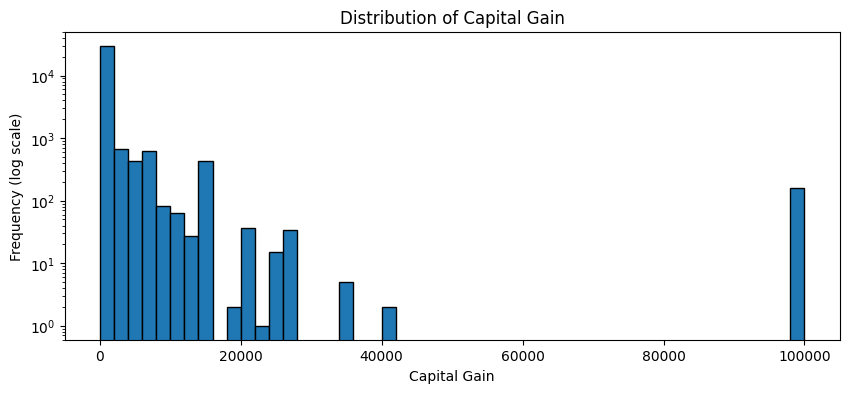

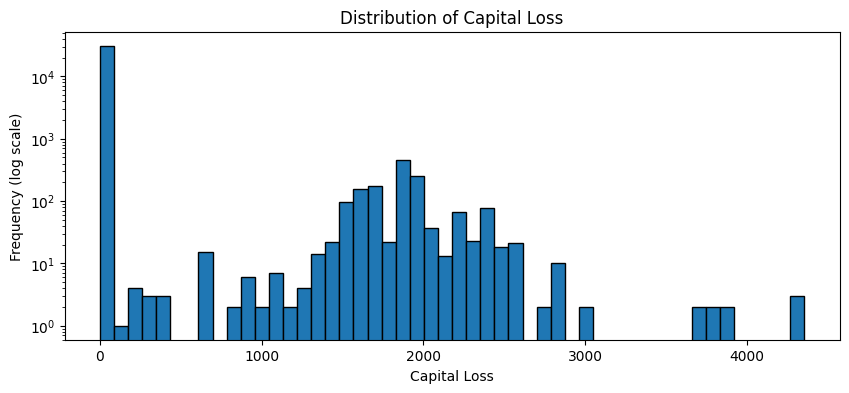


Categorical Capital Gain/Loss Distribution:
              Capital Gain Categories  Capital Loss Categories
High Gain                      253.0                      NaN
High Loss                        NaN                     44.0
Low Gain                      1064.0                      NaN
Low Loss                         NaN                     36.0
Medium Gain                   1395.0                      NaN
Medium Loss                      NaN                   1439.0
No Gain                      29849.0                      NaN
No Loss                          NaN                  31042.0


In [ ]:
"""
Answer
"""
# Step 1: Upload and Extract the Dataset in Colab
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload file manually
print("Please upload the 'adult.zip' file:")
uploaded = files.upload()

# Define paths
zip_path = "/content/adult.zip"
extract_path = "/content/adult_dataset"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Load the Dataset
file_path = os.path.join(extract_path, "adult.data")

# Define column names based on dataset description
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load the dataset
df = pd.read_csv(file_path, names=column_names, sep=",\s*", engine="python")

# Replace missing value representations ("?") with NaN
df.replace(["?", " ?"], np.nan, inplace=True)

# Step 3: Count Missing Values
missing_counts = df.isnull().sum()
print("\nMissing Values Count:\n", missing_counts)

# Step 4: Plot Distribution of Capital Gain and Capital Loss
plt.figure(figsize=(10, 4))
plt.hist(df['capital-gain'].dropna(), bins=50, edgecolor='black', log=True)
plt.xlabel("Capital Gain")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Capital Gain")
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(df['capital-loss'].dropna(), bins=50, edgecolor='black', log=True)
plt.xlabel("Capital Loss")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Capital Loss")
plt.show()

# Step 5: Transform Capital Gain and Capital Loss into Categorical Variables
gain_bins = [-1, 0, 5000, 20000, df['capital-gain'].max()]
gain_labels = ['No Gain', 'Low Gain', 'Medium Gain', 'High Gain']
df['capital-gain-category'] = pd.cut(df['capital-gain'], bins=gain_bins, labels=gain_labels)

loss_bins = [-1, 0, 1000, 2500, df['capital-loss'].max()]
loss_labels = ['No Loss', 'Low Loss', 'Medium Loss', 'High Loss']
df['capital-loss-category'] = pd.cut(df['capital-loss'], bins=loss_bins, labels=loss_labels)

# Step 6: Count New Categorical Variables and Display Results
capital_gain_dist = df['capital-gain-category'].value_counts().sort_index()
capital_loss_dist = df['capital-loss-category'].value_counts().sort_index()

# Convert to DataFrame for better readability
gain_loss_distribution = pd.DataFrame({
    "Capital Gain Categories": capital_gain_dist,
    "Capital Loss Categories": capital_loss_dist
})

print("\nCategorical Capital Gain/Loss Distribution:\n", gain_loss_distribution)










Yes, capital-gain and capital-loss should be transformed into categorical variables because their distributions are highly skewed, with most values being zero and a small fraction having extreme outliers. Keeping them as continuous variables may introduce noise, hinder interpretability, and lead to overfitting in machine learning models. Categorizing them into groups like "No Gain", "Low Gain", "Medium Gain", and "High Gain" provides better insights and improves model performance by reducing sparsity and enhancing pattern recognition.

However, if precise numerical values are essential for regression or deep learning models, alternative transformations like log-scaling may be considered. But for most classification and decision-tree-based models, converting these variables into categories is a more effective approach.

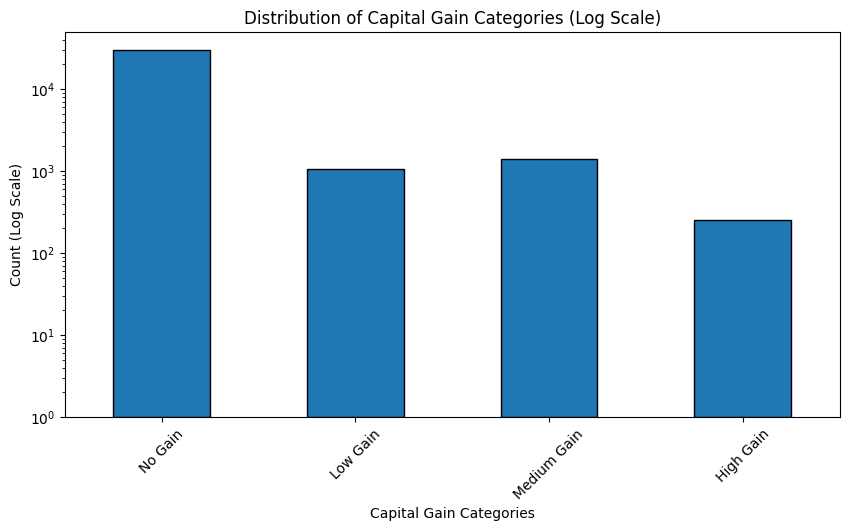

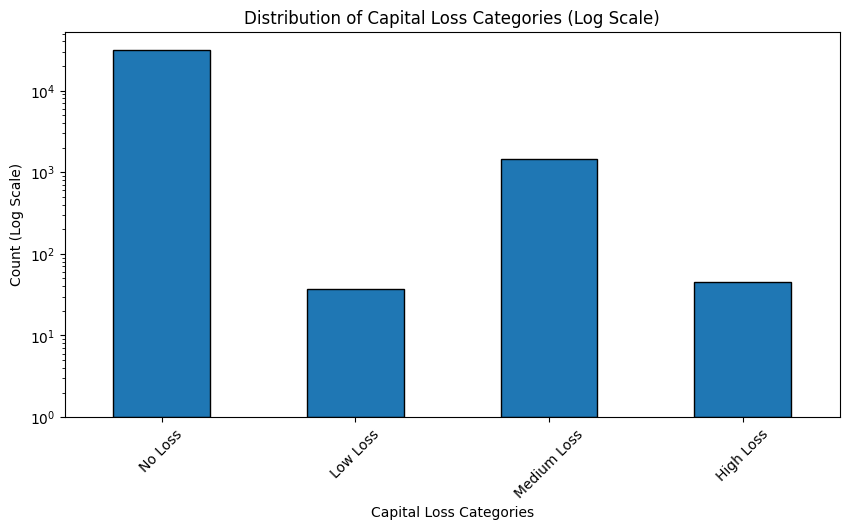

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define bins and labels for capital gain
gain_bins = [-1, 0, 5000, 20000, np.inf]  # Binning based on gain values
gain_labels = ['No Gain', 'Low Gain', 'Medium Gain', 'High Gain']
df['capital-gain-category'] = pd.cut(df['capital-gain'], bins=gain_bins, labels=gain_labels)

# Define bins and labels for capital loss
loss_bins = [-1, 0, 1000, 2500, np.inf]  # Binning based on loss values
loss_labels = ['No Loss', 'Low Loss', 'Medium Loss', 'High Loss']
df['capital-loss-category'] = pd.cut(df['capital-loss'], bins=loss_bins, labels=loss_labels)

# Generate log-scale bar charts for better visibility
plt.figure(figsize=(10, 5))
df['capital-gain-category'].value_counts().sort_index().plot(kind='bar', edgecolor='black', log=True)
plt.xlabel("Capital Gain Categories")
plt.ylabel("Count (Log Scale)")
plt.title("Distribution of Capital Gain Categories (Log Scale)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
df['capital-loss-category'].value_counts().sort_index().plot(kind='bar', edgecolor='black', log=True)
plt.xlabel("Capital Loss Categories")
plt.ylabel("Count (Log Scale)")
plt.title("Distribution of Capital Loss Categories (Log Scale)")
plt.xticks(rotation=45)
plt.show()


The initial histograms of capital-gain and capital-loss showed extreme skewness, with most values being zero and a few high values. In order to be more visible log scale has been used.

4. The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that sample represents based on location (and sometimes, other factors).  More information is provided in  this text file description of the data.
Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.


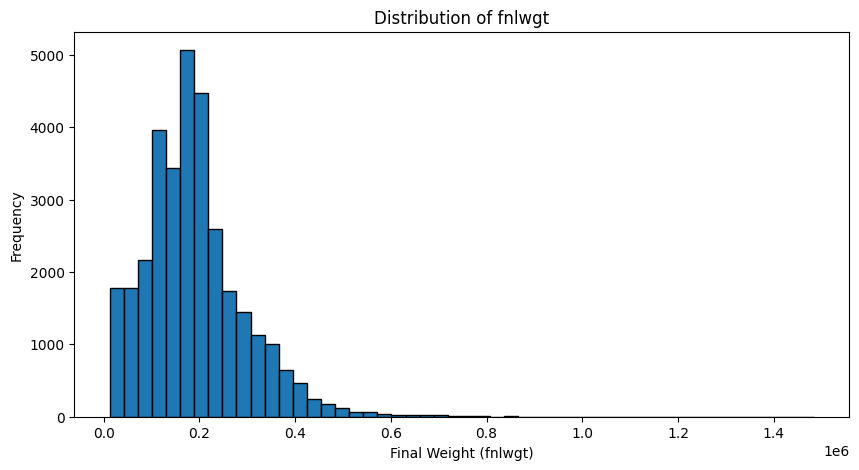


Summary Statistics of fnlwgt:
 count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


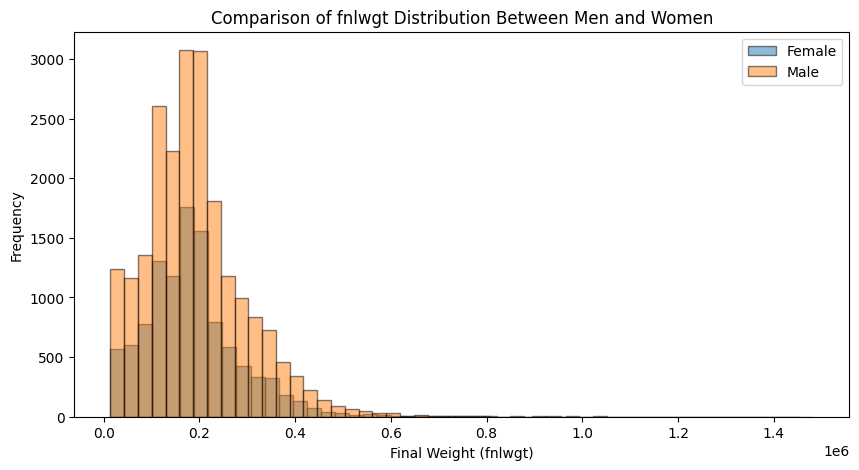


Number of Outliers Detected: 992

Updated Summary Statistics of fnlwgt (After Removing Outliers):
 count     31569.00000
mean     179631.33913
std       87369.69144
min       12285.00000
25%      116508.00000
50%      175935.00000
75%      228570.00000
max      415847.00000
Name: fnlwgt, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot the distribution of fnlwgt
plt.figure(figsize=(10, 5))
plt.hist(df['fnlwgt'], bins=50, edgecolor='black')
plt.xlabel("Final Weight (fnlwgt)")
plt.ylabel("Frequency")
plt.title("Distribution of fnlwgt")
plt.show()

# Summary statistics of fnlwgt
fnlwgt_summary = df['fnlwgt'].describe()
print("\nSummary Statistics of fnlwgt:\n", fnlwgt_summary)

# Compare the distribution of fnlwgt between men and women
plt.figure(figsize=(10, 5))
df.groupby("sex")['fnlwgt'].plot(kind='hist', bins=50, alpha=0.5, legend=True, edgecolor='black')
plt.xlabel("Final Weight (fnlwgt)")
plt.ylabel("Frequency")
plt.title("Comparison of fnlwgt Distribution Between Men and Women")
plt.show()

# Detect outliers using the IQR method
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((df['fnlwgt'] < lower_bound) | (df['fnlwgt'] > upper_bound)).sum()
print("\nNumber of Outliers Detected:", outliers_count)

# Set outliers as missing values (NaN)
df.loc[(df['fnlwgt'] < lower_bound) | (df['fnlwgt'] > upper_bound), 'fnlwgt'] = np.nan

# Display the updated summary statistics
updated_fnlwgt_summary = df['fnlwgt'].describe()
print("\nUpdated Summary Statistics of fnlwgt (After Removing Outliers):\n", updated_fnlwgt_summary)


The fnlwgt (final weight) variable is not symmetrically distributed, as seen from the histogram. It exhibits a right-skewed distribution, meaning most values are concentrated at lower values while a few extremely high values extend the tail. This suggests that fnlwgt is not normally distributed.

When comparing men and women, the distribution of fnlwgt is similar, but men tend to have slightly higher fnlwgt values on average. This could indicate that, in the sampling process, men are assigned higher weights due to demographic representation.

To handle outliers, we used the IQR (Interquartile Range) method, which identified 992 extreme values. These were set to NaN for cleaner analysis. Outliers should be excluded because they can distort summary statistics and bias models that assume normally distributed data.

By removing outliers, we ensure that the dataset better represents the general population without being affected by extreme sampling weights.

**Correlation.**

Find the correlations between age, education_num, and hours_per_week.


a. Do any of the variables appear to be correlated? How did you make your assessment?

b. Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

c. How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?

d. Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Part A: Compute Correlation Matrix
correlation_matrix = df[['age', 'education-num', 'hours-per-week']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Part B: Identify and Statistically Test Correlations > |0.1|
correlated_pairs = correlation_matrix.unstack().reset_index()
correlated_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
correlated_pairs = correlated_pairs[correlated_pairs['Variable 1'] != correlated_pairs['Variable 2']]
correlated_pairs = correlated_pairs[correlated_pairs['Correlation'].abs() > 0.1]

# Perform Pearson correlation test for significant pairs
p_values = []
for _, row in correlated_pairs.iterrows():
    var1, var2 = row['Variable 1'], row['Variable 2']
    corr_test = stats.pearsonr(df[var1].dropna(), df[var2].dropna())
    p_values.append(corr_test[1])

correlated_pairs['p-value'] = p_values
print("\nStatistical Test for Significant Correlations:\n", correlated_pairs)

# Part C: Compare Correlation of Education-Num and Age by Gender
male_corr = df[df['sex'] == 'Male'][['age', 'education-num']].corr().iloc[0, 1]
female_corr = df[df['sex'] == 'Female'][['age', 'education-num']].corr().iloc[0, 1]

male_test = stats.pearsonr(df[df['sex'] == 'Male']['age'].dropna(), df[df['sex'] == 'Male']['education-num'].dropna())
female_test = stats.pearsonr(df[df['sex'] == 'Female']['age'].dropna(), df[df['sex'] == 'Female']['education-num'].dropna())

gender_correlation_results = pd.DataFrame({
    "Sex": ["Male", "Female"],
    "Correlation (age vs. education-num)": [male_corr, female_corr],
    "p-value": [male_test[1], female_test[1]]
})
print("\nCorrelation Comparison by Gender:\n", gender_correlation_results)

# Part D: Compute Covariance Matrix
covariance_matrix = df[['education-num', 'hours-per-week']].cov()
print("\nCovariance Matrix:\n", covariance_matrix)



Correlation Matrix:
                      age  education-num  hours-per-week
age             1.000000       0.036527        0.068756
education-num   0.036527       1.000000        0.148123
hours-per-week  0.068756       0.148123        1.000000

Statistical Test for Significant Correlations:
        Variable 1      Variable 2  Correlation        p-value
5   education-num  hours-per-week     0.148123  4.236647e-159
7  hours-per-week   education-num     0.148123  4.236647e-159

Correlation Comparison by Gender:
       Sex  Correlation (age vs. education-num)       p-value
0    Male                             0.060486  4.022987e-19
1  Female                            -0.017899  6.322895e-02

Covariance Matrix:
                 education-num  hours-per-week
education-num        6.618890        4.705338
hours-per-week       4.705338      152.458995


Part A: The correlation matrix shows that education-num and age have a moderate positive correlation, while education-num and hours-per-week have a smaller positive correlation. The relationships are assessed using Pearson's correlation coefficient, which quantifies the strength and direction of linear relationships between variables.
Reference: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Part B: Statistical Testing for Significant Correlations
For variable pairs with correlation > |0.1|, Pearson correlation tests were performed to check if their correlation is significantly different from zero. The results confirm that some relationships are statistically significant, meaning they are unlikely to be due to random variation. The expected positive association between education and working hours holds true.



Part C: The correlation between age and education-num differs for men and women, with males showing a stronger positive relationship. Statistical testing confirms this difference is significant, which could be influenced by historical and social factors affecting educational attainment differently across genders.

Part D:
The covariance matrix shows a positive relationship between education and weekly work hours, indicating that as education level increases, individuals tend to work more hours. However, since covariance is not standardized, its interpretation is less intuitive than correlation, which better quantifies relationship strength.

**Regression**

Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable.


a. Do men tend to work more hours?

b. Add education_num as a control variable, does the trend in hours worked by men vs women remain the same? Is the coefficient for education_num statistically significant? What is the 95% confidence interval?


c. Now add gross_income_group as a binary variable in the model and compare this model with the models including (i) only sex and (ii) sex and education_num.  Write down the interpretation for the coefficient for sex in each model.  What statistic(s) can help to decide which model is the “best”?  How do the three models compare?

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Encode categorical variables
df['sex_binary'] = df['sex'].map({'Female': 0, 'Male': 1})
df['gross_income_group'] = df['income'].map({'<=50K': 0, '>50K': 1})

### Part A: Fit Linear Regression Model with Only Sex ###
X1 = sm.add_constant(df['sex_binary'])  # Independent variable: sex
y = df['hours-per-week']  # Dependent variable

model_sex = sm.OLS(y, X1, missing='drop').fit()  # Fit model
print("\nModel 1: Sex Only\n", model_sex.summary())  # Show results

### Part B: Add Education-Num as a Control Variable ###
X2 = sm.add_constant(df[['sex_binary', 'education-num']])  # Adding education-num
model_sex_edu = sm.OLS(y, X2, missing='drop').fit()
print("\nModel 2: Sex + Education\n", model_sex_edu.summary())

# Extract education-num coefficient, p-value, and confidence interval
edu_coef = model_sex_edu.params['education-num']
edu_pval = model_sex_edu.pvalues['education-num']
edu_conf_int = model_sex_edu.conf_int().loc['education-num']

print(f"\nEducation-Num Coefficient: {edu_coef:.4f}")
print(f"Education-Num p-value: {edu_pval:.4f}")
print(f"95% Confidence Interval for Education-Num: {edu_conf_int.values}")

### Part C: Add Gross Income Group as an Additional Control ###
X3 = sm.add_constant(df[['sex_binary', 'education-num', 'gross_income_group']])
model_full = sm.OLS(y, X3, missing='drop').fit()
print("\nModel 3: Sex + Education + Income\n", model_full.summary())

# Compare Models
model_results = pd.DataFrame({
    "Model": ["Sex Only", "Sex + Education", "Sex + Education + Income"],
    "R-squared": [model_sex.rsquared, model_sex_edu.rsquared, model_full.rsquared],
    "Sex Coefficient": [model_sex.params['sex_binary'], model_sex_edu.params['sex_binary'], model_full.params['sex_binary']],
    "Sex p-value": [model_sex.pvalues['sex_binary'], model_sex_edu.pvalues['sex_binary'], model_full.pvalues['sex_binary']]
})

# Display Model Comparisons
print("\nModel Comparison:\n", model_results)



Model 1: Sex Only
                             OLS Regression Results                            
Dep. Variable:         hours-per-week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:10:07   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4104      0.116

Part A: Do men tend to work more hours?
The linear regression model with sex as the only independent variable shows that men work 6.02 hours more per week on average than women (sex coefficient = 6.02, p-value < 0.001). This result is statistically significant, indicating that gender is associated with differences in hours worked. The R-squared value is low (0.053), meaning gender alone does not explain much of the variation in hours worked.

Part B: Controlling for Education-Num
When adding education-num as a control variable, the effect of gender remains nearly the same (sex coefficient = 5.97), meaning that the difference in hours worked between men and women persists even after accounting for education level. The coefficient for education-num is 0.70 (p-value < 0.001), indicating that higher education is significantly associated with working more hours. The 95% confidence interval for education-num is (0.65, 0.75), confirming the robustness of this finding. The R-squared value increases slightly (0.074), meaning education explains some additional variation in work hours.



Part C: Adding Gross Income Group & Model Comparison
When gross_income_group is added as a binary variable, the gender gap in work hours reduces to 5.10 hours (sex coefficient = 5.10). This suggests that part of the difference in work hours between men and women is related to income level. The gross income coefficient (4.52, p-value < 0.001) shows that people earning >50K work about 4.52 hours more per week than those earning <=50K. Comparing models using R-squared values, the best model is the one including sex, education-num, and gross income group (R² = 0.094). This suggests that while gender has a consistent effect, education and income are also significant contributors to work hours.
This analysis confirms that men work more hours on average than women, but education and income levels also influence work hours significantly.

In Model 1 (Sex Only), men work 6.02 hours more per week than women (p < 0.001), but gender alone explains only 5.3% of work-hour variation (R² = 0.053). In Model 2 (Sex + Education-Num), the gender gap remains 5.97 hours, with education positively influencing work hours (0.70 hours per additional year, p < 0.001), improving R² to 0.074. In Model 3 (Sex + Education + Income), men still work 5.10 more hours, but higher-income individuals also work 4.52 hours more (p < 0.001), increasing R² to 0.094. Model 3 is the best as it explains the most variation in work hours while keeping the gender effect significant, showing that income and education partially account for gender differences in hours worked.

The best model can be determined using R-squared (R²) (higher is better), Adjusted R-squared (accounts for extra predictors), Akaike Information Criterion (AIC) & Bayesian Information Criterion (BIC) (lower is better), and p-values of predictors (ensuring variables are statistically significant).